## time series regression model  
  
     x축이 time  
     연속되는 숫자

In [ ]:
!pip install prophet

In [42]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

Importing plotly failed. Interactive plots will not work.


In [43]:
import pandas as pd

In [44]:
df = pd.read_csv("example_prphet.csv")
df.head()
df.tail()


,ds,y
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871
2904,2016-01-20,8.891374


    컬럼 이름이 중요함. 무조건 ds(timestamp)와 y(변화량)로 만들어야 함.

* 시계열 분석  
    AR - 오늘 기준으로 전날과 비교하여 오차를 합산하여 오늘에 이르는 것  
    MA - 어제와 오늘(하루사이의 오차)를 확인하여 보정하는 것.   
    ARMA - 오늘과 과거를 트레이싱, 포인트의 오차를 합친 것  
    (위의 것의 전제조건: 어느 시점에는 평균과 표준편차로 수렴할 것)    
    ARIMA - 동일한 카피를 떠서 하루 전날로 각 데이터를 미뤄서 원본과 카피를 뺀다.    
    (정상성에도 사용할 수 있음)  
    (p함수 d함수 q함수)

In [45]:
df["ds"].min()

'2007-12-10'

In [46]:
df["ds"].max()

'2016-01-20'

In [47]:
model = Prophet()
model

In [48]:
model.fit(df)
# 학습 먼저 - 통으로 던지면 알아서 해준다. 

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [49]:
# 궁금해하는 시계열 범위를 만들기

model.make_future_dataframe(periods=90)
#period는 day기준 (세 달: 90일) 

,ds
0,2007-12-10
1,2007-12-11
2,2007-12-12
3,2007-12-13
4,2007-12-14
...,...
2990,2016-04-15
2991,2016-04-16
2992,2016-04-17
2993,2016-04-18


In [50]:
future=model.make_future_dataframe(periods=90)

In [51]:
pred= model.predict(future)

# 결과값을 저장하기 

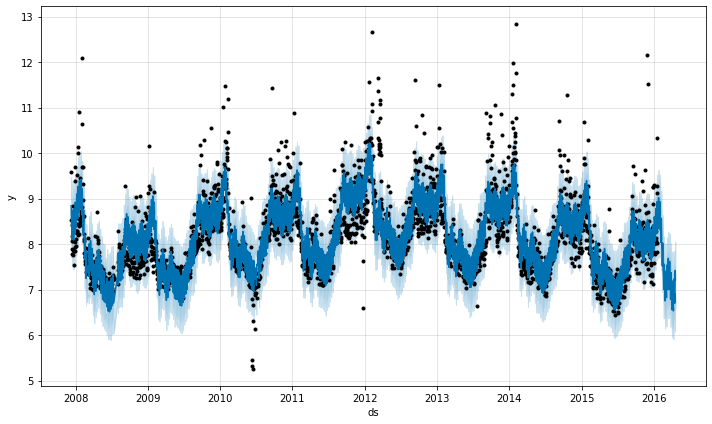

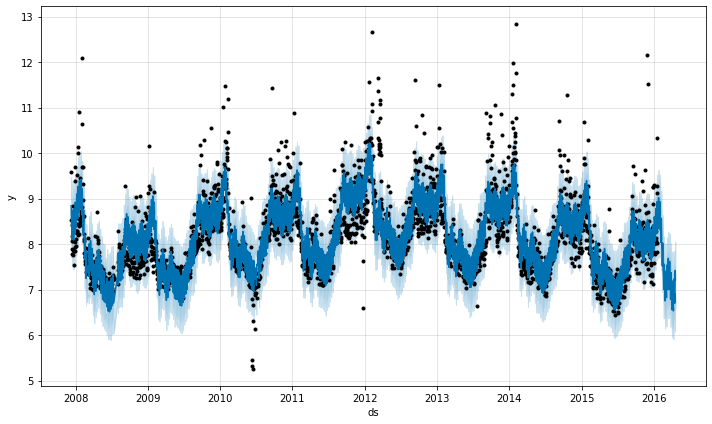

In [52]:
model.plot(pred)

# 검정색: 실제 데이터, 파란색: 내가 준 데이터를 tracing한 결과 
# changepoint_range는 학습한 것의 범위 0.8

In [53]:
pred

# yhat을 통해서 시계열적 예측을 나타냄

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.039346,8.218938,9.470724,8.039346,8.039346,0.803277,0.803277,0.803277,0.352299,0.352299,0.352299,0.450978,0.450978,0.450978,0.0,0.0,0.0,8.842622
1,2007-12-11,8.037802,7.979422,9.220221,8.037802,8.037802,0.553349,0.553349,0.553349,0.119636,0.119636,0.119636,0.433714,0.433714,0.433714,0.0,0.0,0.0,8.591151
2,2007-12-12,8.036259,7.709552,9.031615,8.036259,8.036259,0.350724,0.350724,0.350724,-0.066658,-0.066658,-0.066658,0.417383,0.417383,0.417383,0.0,0.0,0.0,8.386983
3,2007-12-13,8.034715,7.750439,8.965845,8.034715,8.034715,0.330166,0.330166,0.330166,-0.072265,-0.072265,-0.072265,0.402430,0.402430,0.402430,0.0,0.0,0.0,8.364881
4,2007-12-14,8.033172,7.740620,8.961734,8.033172,8.033172,0.319694,0.319694,0.319694,-0.069568,-0.069568,-0.069568,0.389262,0.389262,0.389262,0.0,0.0,0.0,8.352865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2990,2016-04-15,7.475023,6.280049,7.545297,7.450224,7.500386,-0.560960,-0.560960,-0.560960,-0.069568,-0.069568,-0.069568,-0.491392,-0.491392,-0.491392,0.0,0.0,0.0,6.914062
2991,2016-04-16,7.474007,6.071213,7.313881,7.448329,7.500050,-0.773035,-0.773035,-0.773035,-0.311715,-0.311715,-0.311715,-0.461320,-0.461320,-0.461320,0.0,0.0,0.0,6.700972
2992,2016-04-17,7.472991,6.447858,7.706181,7.446626,7.499614,-0.383375,-0.383375,-0.383375,0.048272,0.048272,0.048272,-0.431646,-0.431646,-0.431646,0.0,0.0,0.0,7.089616
2993,2016-04-18,7.471975,6.821816,8.050741,7.444699,7.498778,-0.050814,-0.050814,-0.050814,0.352299,0.352299,0.352299,-0.403113,-0.403113,-0.403113,0.0,0.0,0.0,7.421161


### ex) 주가 예측

In [101]:
!pip install finance-datareader

In [102]:
import FinanceDataReader as fdr

In [103]:
samsung = fdr.DataReader("005930") # 삼전
samsung.tail()

# 장 마감 기준 : close
# ds: Date, y:Close

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-14,77700,78100,77100,77300,10096725,-0.007702
2022-01-17,77600,77800,76900,77500,8785122,0.002587
2022-01-18,77600,77800,76600,77000,9592788,-0.006452
2022-01-19,76500,76900,76100,76300,10598290,-0.009091
2022-01-20,76200,76700,75900,76500,9446656,0.002621


In [104]:
samsung.index

DatetimeIndex(['1997-12-11', '1997-12-12', '1997-12-13', '1997-12-15',
               '1997-12-16', '1997-12-17', '1997-12-19', '1997-12-20',
               '1997-12-22', '1997-12-23',
               ...
               '2022-01-07', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14', '2022-01-17', '2022-01-18',
               '2022-01-19', '2022-01-20'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

In [105]:
samsung["ds"]=samsung.index
samsung["y"]=samsung["Close"]

In [106]:
samsung.tail()

,Open,High,Low,Close,Volume,Change,ds,y
Date,,,,,,,,
2022-01-14,77700,78100,77100,77300,10096725,-0.007702,2022-01-14,77300
2022-01-17,77600,77800,76900,77500,8785122,0.002587,2022-01-17,77500
2022-01-18,77600,77800,76600,77000,9592788,-0.006452,2022-01-18,77000
2022-01-19,76500,76900,76100,76300,10598290,-0.009091,2022-01-19,76300
2022-01-20,76200,76700,75900,76500,9446656,0.002621,2022-01-20,76500


<AxesSubplot:xlabel='ds', ylabel='Close'>

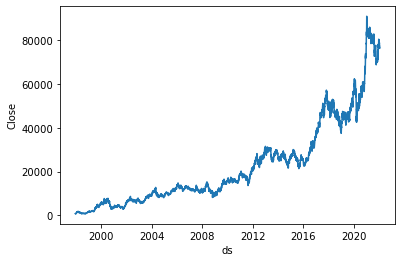

In [107]:
# 그래프 그려보기 -> 정상성이 아님. 
import seaborn as sns

sns.lineplot(data=samsung, x="ds", y="Close")


In [108]:
model=Prophet()


In [109]:
model.fit(samsung)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [110]:
future_samsung=model.make_future_dataframe(periods=30)

future_samsung.tail(3)

,ds
6027,2022-02-17
6028,2022-02-18
6029,2022-02-19


In [111]:
pred_samsung=model.predict(future_samsung)
pred_samsung.tail(3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
6027,2022-02-17,75578.057094,70842.180673,80982.539506,75578.057094,75578.057094,571.226650,571.226650,571.226650,-27.559935,-27.559935,-27.559935,598.786585,598.786585,598.786585,0.0,0.0,0.0,76149.283744
6028,2022-02-18,75599.347200,70632.978018,81580.678567,75599.347200,75599.347200,489.533456,489.533456,489.533456,-99.443338,-99.443338,-99.443338,588.976794,588.976794,588.976794,0.0,0.0,0.0,76088.880656
6029,2022-02-19,75620.637305,71207.602247,81009.768037,75620.637305,75620.637305,551.521604,551.521604,551.521604,-28.115783,-28.115783,-28.115783,579.637387,579.637387,579.637387,0.0,0.0,0.0,76172.158909


In [112]:
pred_samsung["ds"]

0      1997-12-11
1      1997-12-12
2      1997-12-13
3      1997-12-15
4      1997-12-16
          ...    
6025   2022-02-15
6026   2022-02-16
6027   2022-02-17
6028   2022-02-18
6029   2022-02-19
Name: ds, Length: 6030, dtype: datetime64[ns]

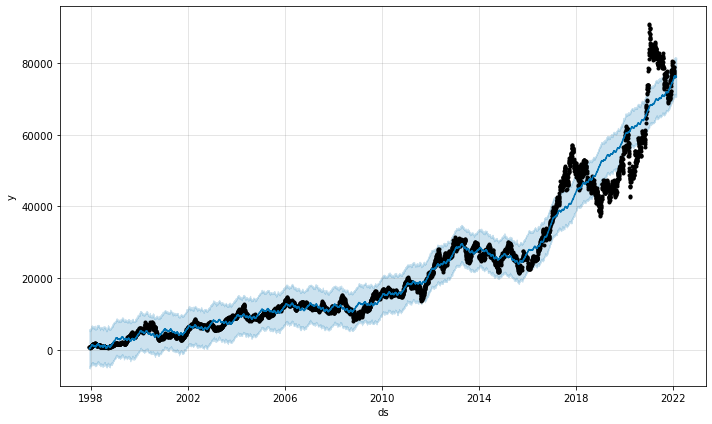

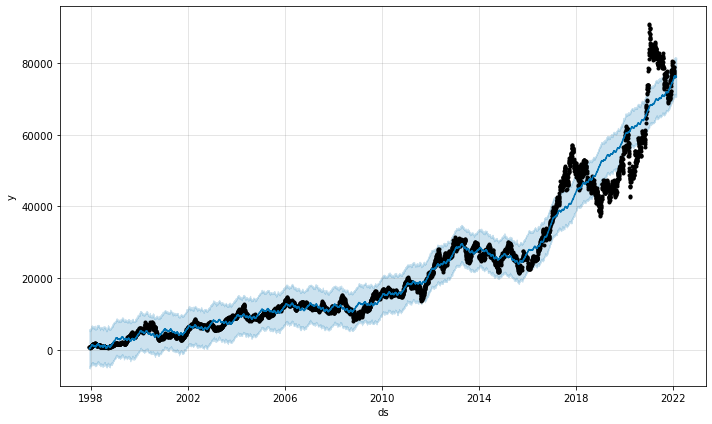

In [113]:
model.plot(pred_samsung)

In [114]:
# 내일 예측해보기
pred_samsung.tail(5)

# 내일은 떨어진다.. 
# periods에 따라 값이 달라진다. 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
6025,2022-02-15,75535.476883,71156.304089,80944.288517,75535.476883,75535.476883,602.990408,602.990408,602.990408,-17.552292,-17.552292,-17.552292,620.542701,620.542701,620.542701,0.0,0.0,0.0,76138.467291
6026,2022-02-16,75556.766989,70895.791246,81109.284490,75556.766989,75556.766989,570.846725,570.846725,570.846725,-38.403590,-38.403590,-38.403590,609.250315,609.250315,609.250315,0.0,0.0,0.0,76127.613713
6027,2022-02-17,75578.057094,70842.180673,80982.539506,75578.057094,75578.057094,571.226650,571.226650,571.226650,-27.559935,-27.559935,-27.559935,598.786585,598.786585,598.786585,0.0,0.0,0.0,76149.283744
6028,2022-02-18,75599.347200,70632.978018,81580.678567,75599.347200,75599.347200,489.533456,489.533456,489.533456,-99.443338,-99.443338,-99.443338,588.976794,588.976794,588.976794,0.0,0.0,0.0,76088.880656
6029,2022-02-19,75620.637305,71207.602247,81009.768037,75620.637305,75620.637305,551.521604,551.521604,551.521604,-28.115783,-28.115783,-28.115783,579.637387,579.637387,579.637387,0.0,0.0,0.0,76172.158909


In [115]:
from prophet.plot import plot_plotly, plot_components_plotly 
from prophet.plot import add_changepoints_to_plot

[[<matplotlib.lines.Line2D at 0x1f4b529b190>],

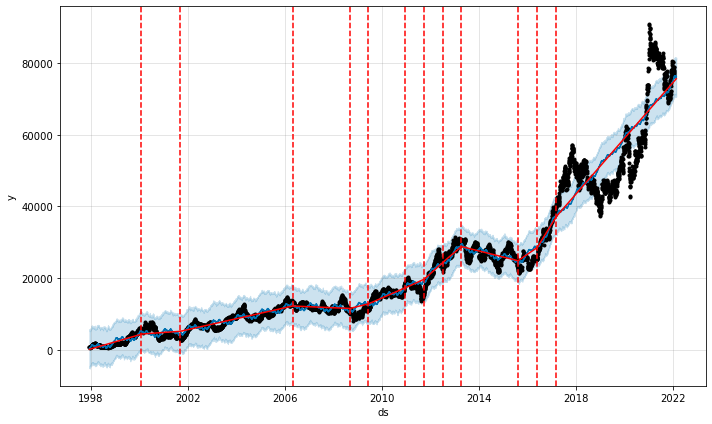

In [116]:
fig = model.plot(pred_samsung)
add_changepoints_to_plot(fig.gca(), model, pred_samsung)

# 빨간지점: 외부적 요인이 일어난 것.

# 시계열 회귀분석 

### 정상성 검증  
    정상성: 평균과 분산이 한 곳에 수렴


In [117]:
pred_rev1 = pred_samsung.tail(30)
pred_rev2 = pred_samsung.shift(axis=0, periods=-1)
# 하루를 미는 것 : shift
# axis 0은 행(가로)으로 이동, 1은 축으로 이동

In [118]:
pred_samsung.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1997-12-11,137.501063,-4600.409045,5782.911692,137.501063,137.501063,171.553546,171.553546,171.553546,-27.559935,-27.559935,-27.559935,199.113481,199.113481,199.113481,0.0,0.0,0.0,309.054609
1,1997-12-12,142.936208,-5087.555911,5208.065307,142.936208,142.936208,119.611592,119.611592,119.611592,-99.443338,-99.443338,-99.443338,219.054929,219.054929,219.054929,0.0,0.0,0.0,262.547800
2,1997-12-13,148.371353,-4436.575210,5432.223442,148.371353,148.371353,208.985460,208.985460,208.985460,-28.115783,-28.115783,-28.115783,237.101243,237.101243,237.101243,0.0,0.0,0.0,357.356813
3,1997-12-15,159.241643,-5015.883710,5183.996641,159.241643,159.241643,168.412066,168.412066,168.412066,-99.512006,-99.512006,-99.512006,267.924071,267.924071,267.924071,0.0,0.0,0.0,327.653708
4,1997-12-16,164.676788,-4696.202910,5682.020368,164.676788,164.676788,263.482320,263.482320,263.482320,-17.552292,-17.552292,-17.552292,281.034613,281.034613,281.034613,0.0,0.0,0.0,428.159108


In [119]:
pred_rev2.head()

# 하루 밀린 것을 볼 수 있음 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1997-12-12,142.936208,-5087.555911,5208.065307,142.936208,142.936208,119.611592,119.611592,119.611592,-99.443338,-99.443338,-99.443338,219.054929,219.054929,219.054929,0.0,0.0,0.0,262.547800
1,1997-12-13,148.371353,-4436.575210,5432.223442,148.371353,148.371353,208.985460,208.985460,208.985460,-28.115783,-28.115783,-28.115783,237.101243,237.101243,237.101243,0.0,0.0,0.0,357.356813
2,1997-12-15,159.241643,-5015.883710,5183.996641,159.241643,159.241643,168.412066,168.412066,168.412066,-99.512006,-99.512006,-99.512006,267.924071,267.924071,267.924071,0.0,0.0,0.0,327.653708
3,1997-12-16,164.676788,-4696.202910,5682.020368,164.676788,164.676788,263.482320,263.482320,263.482320,-17.552292,-17.552292,-17.552292,281.034613,281.034613,281.034613,0.0,0.0,0.0,428.159108
4,1997-12-17,170.111932,-5229.259518,5404.913059,170.111932,170.111932,254.505914,254.505914,254.505914,-38.403590,-38.403590,-38.403590,292.909504,292.909504,292.909504,0.0,0.0,0.0,424.617846


In [120]:
pred_rev3 = pd.DataFrame(pred_rev1['ds'])
pred_rev3['yhat'] = pred_rev2['yhat'] - pred_rev1['yhat']

In [121]:
pred_rev3.head(3)

,ds,yhat
6000,2022-01-21,93.043517
6001,2022-01-22,356.835080
6002,2022-01-23,-395.399674


<AxesSubplot:xlabel='ds', ylabel='yhat'>

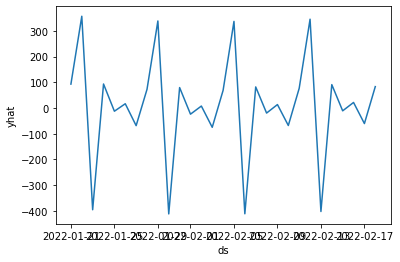

In [122]:

sns.lineplot(data=pred_rev3, x='ds', y='yhat')

# 어딘가로 수렴하고 있음 -> 정상성 